# PART 1 Data exploration

#### Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [2]:
sou = pd.read_csv('data/SOTU.csv')

sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


#### Number of Speeches per President

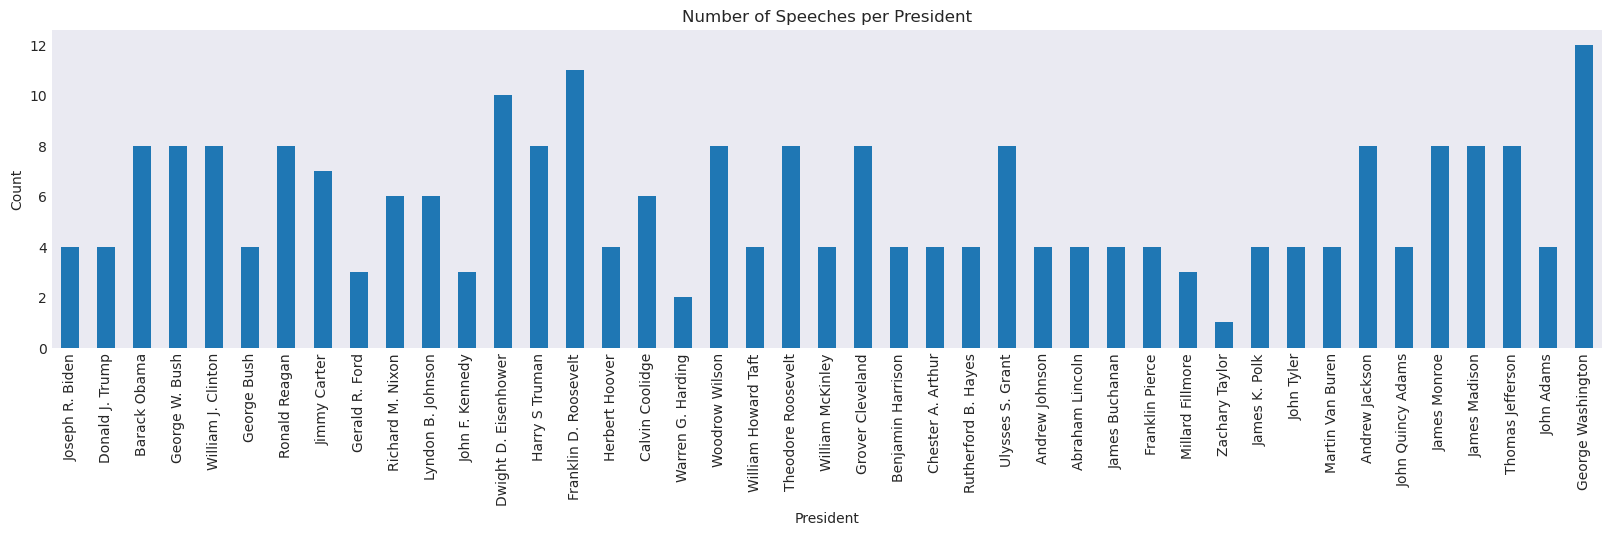

In [3]:
# Hint - use value_counts() on the President column
# Hint - sort in order of dataframe
# Plot 
# Hint - use the .plot() method for Pandas Series, make sure all presidents show up on x-axis


sou_sorted = sou.sort_values("Year", ascending = False)
pres_order = sou_sorted["President"].drop_duplicates().tolist()
speech_count = sou["President"].value_counts()
speech_count = speech_count.reindex(pres_order)


plt.figure(figsize=(20, 6))

speech_count.plot(kind = 'bar')
plt.title("Number of Speeches per President")
plt.xlabel("President")
plt.ylabel("Count")
plt.subplots_adjust(bottom=0.35)

#### Analysis 

For the number of the speech per president we can conclude that that it is primarily driven by the presidential term length. President who served two full terms (i.e, Obama, Reagan, Cliton) shows higher counts compared to one-term president. Comparing earlier president and the modern president, we can see that the earlier president delivered speech much more frequently or inconsistenly probably due to the different tradition format; the modern presidents have a standardized behavior clustering around 7 - 8 speeches.  

#### Number of Speeches Per year

Text(0, 0.5, 'Count')

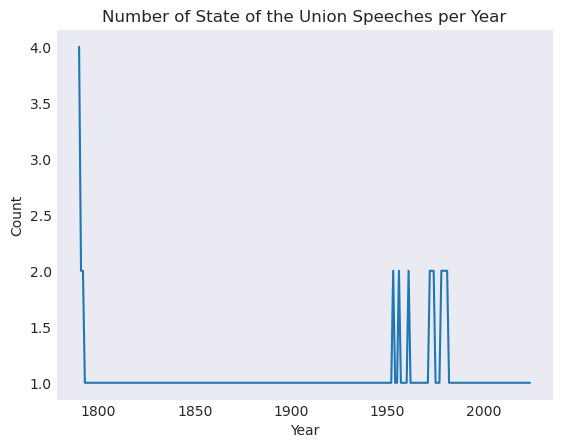

In [4]:
# Hint - Use value counts and sort by years

speech_count_year = sou["Year"].value_counts().sort_index()

speech_count_year.plot(kind = "line")
plt.title("Number of State of the Union Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Count")


#### Analysis 

From this graph, we can see that most years only have one state of the union speech. This mostly is caused by the modern practice of delivering exactly one annual address. The reason that the earlier years (1790 - 1800) have higher counts, becasue at that time the formate was not yet standardized, and the president needs to delivered multiple communication to the states. The spikes around the mid-20th century is mostly due to the special time such as war and other economic events. 

#### Word Count Distribution

Text(0, 0.5, 'Count')

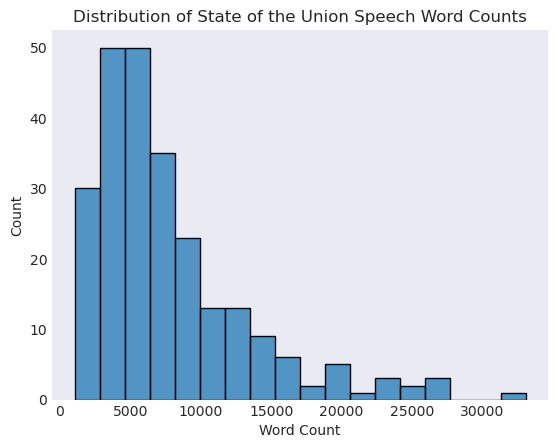

In [5]:
sns.histplot(sou["Word Count"])
plt.title("Distribution of State of the Union Speech Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")

#### Analysis

The Distriubtion of the speech word count is heavily right-skewed. Most speeches is bewten 3000 and 8000 words indicating that this is the typical length. There is a long tail of unusually long speeches above 10,000+ words, which is I suppose mostly come from the 19th centery and early 20th centuries when the message are longer. The extreme outliers suggest that historical context strongly shaped speech length overtime. 

#### Word count Distribution Over year

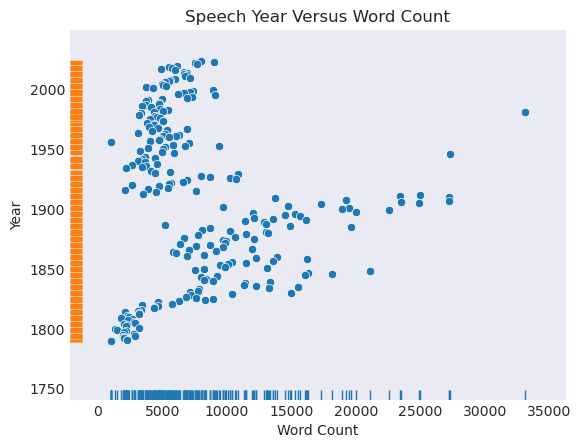

In [7]:

sns.scatterplot(data=sou, x="Word Count", y="Year")

sns.rugplot(data=sou, x="Word Count")

sns.rugplot(data=sou, y="Year")

plt.title("Speech Year Versus Word Count")
plt.show()


#### Analysis

This scatterplot shows a historical pattern in State of the Union speech lengths. From the mid 1800s to early 1900s, speech lengths increase dramatically, producing several very long written messages exceeding 15,000–30,000 words. from 1900s to current day we can see the stanbalization as the speeches cluster bewteen 4500 - 8000 words. The rugplots reinforce these trend by showing a high density of speeches in the modern era with a narrow word count range. 

#### Word Count Distribution Per Presdient 

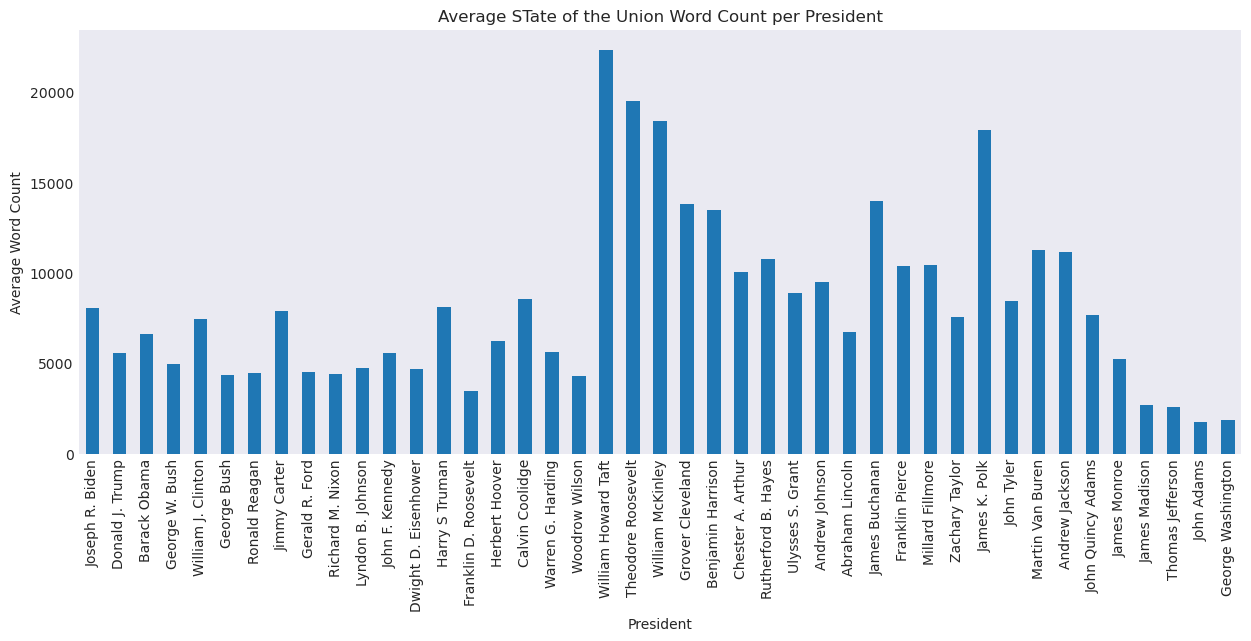

In [19]:
# Hint: use pandas groupby to get mean word count per president 
#then sort by order


mean_word_count = sou.groupby("President")["Word Count"].mean()
mean_word_count = mean_word_count.reindex(pres_order)

plt.figure(figsize=(15, 8))

mean_word_count.plot(kind = 'bar')
plt.title("Average STate of the Union Word Count per President")
plt.xlabel("President")
plt.ylabel("Average Word Count")
plt.subplots_adjust(bottom=0.35)

#### Analysis 

The average word count per president shows a shift acorss historical periods. Modern Presidents from truman onward, faill within the range of 4k to 8k words, again reflecing the standarzied formate. The 19th century president have high averages, often exceeing 15k to 20k, mostly because their message can more so be counted as reports than speeches. This can also be due to the special time with a lot of gloabl events going on. Early president show much shorter averages probably because that time insitutions does not have much of an expectation yet. 